# 1 DATA PREPARATION
- mengunduh data dari kaggle.com
- data berupa gambar terdiri dari file test dan train

# 2 DATA PREPROCESSING

In [ ]:
#Import Library yang Dibutuhkan
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [1]:
#EKSTRAK DATA
!unzip archive.zip

Archive:  archive.zip
  inflating: test/cats/cat_1.jpg     
  inflating: test/cats/cat_106.jpg   
  inflating: test/cats/cat_109.jpg   
  inflating: test/cats/cat_113.jpg   
  inflating: test/cats/cat_114.jpg   
  inflating: test/cats/cat_116.jpg   
  inflating: test/cats/cat_118.jpg   
  inflating: test/cats/cat_119.jpg   
  inflating: test/cats/cat_124.jpg   
  inflating: test/cats/cat_140.jpg   
  inflating: test/cats/cat_147.jpg   
  inflating: test/cats/cat_156.jpg   
  inflating: test/cats/cat_158.jpg   
  inflating: test/cats/cat_162.jpg   
  inflating: test/cats/cat_18.jpg    
  inflating: test/cats/cat_190.jpg   
  inflating: test/cats/cat_203.jpg   
  inflating: test/cats/cat_223.jpg   
  inflating: test/cats/cat_234.jpg   
  inflating: test/cats/cat_244.jpg   
  inflating: test/cats/cat_251.jpg   
  inflating: test/cats/cat_255.jpg   
  inflating: test/cats/cat_268.jpg   
  inflating: test/cats/cat_279.jpg   
  inflating: test/cats/cat_281.jpg   
  inflating: test/cats/cat_2

In [ ]:
#menentukan lokasi train dan test
train_dir = '/content/train'
test_dir = '/content/test'


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [ ]:
#mengGunakan ImageDataGenerator untuk augmentasi gambar  dan normalisasi piksel gambar ke rentang [0, 1].

# Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalisasi
    rotation_range=40,       # Rotasi
    width_shift_range=0.2,   # Pergeseran lebar
    height_shift_range=0.2,  # Pergeseran tinggi
    shear_range=0.2,         # Geser sudut
    zoom_range=0.2,          # Zoom
    horizontal_flip=True,    # Membalik gambar horizontal
    fill_mode='nearest'      # Mengisi piksel kosong
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Hanya normalisasi


In [ ]:
# Load Train Dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),   # Resize semua gambar ke 150x150
    batch_size=32,           # Ukuran batch
    class_mode='binary'      # Klasifikasi biner: Cats vs Dogs
)

# Load Test Dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


# 3 MODEL CNN

In [ ]:
#Library
from tensorflow.keras import layers, models


In [ ]:
### MEMBANGUN ARSITEKTUR CNN dengan beberapa lapisan konvolusi dan pooling.
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten Layer
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(512, activation='relu'))

# Output Layer
model.add(layers.Dense(1, activation='sigmoid'))  # Output untuk klasifikasi biner


In [ ]:
##menggunakan optimizer adam dan loss function binary_crossentropy untuk kasus klasifikasi biner.

#COMPILE MODEL

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:

#STRUKTUR MODEL
model.summary()

#untuk melihat ringkasan arsitektur model yang sudah dibuat.


# 4 Melatih Model CNN

In [ ]:
## AUGMENTASI DATA

#ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi data untuk data training
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalisasi piksel gambar (0-255 -> 0-1)
    rotation_range=20,    # Rotasi acak
    width_shift_range=0.2, # Pergeseran lebar acak
    height_shift_range=0.2,# Pergeseran tinggi acak
    shear_range=0.2,      # Shear transform
    zoom_range=0.2,       # Zoom acak
    horizontal_flip=True, # Flip horizontal
    fill_mode='nearest'   # Fill pixel dengan metode nearest
)

# Generator data test (tidak perlu augmentasi)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
#Load Data Training dan Test

train_dir = '/content/train'  # Ganti dengan path ke folder train
test_dir = '/content/test'    # Ganti dengan path ke folder test

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Ukuran gambar yang konsisten
    batch_size=32,           # Jumlah gambar per batch
    class_mode='binary'      # Karena ini klasifikasi biner
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


In [ ]:
##Mulai Melatih Model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # Total batch per epoch
    epochs=10,                             # Jumlah epoch
    validation_data=test_generator,
    validation_steps=len(test_generator)   # Total batch untuk validasi
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5128 - loss: 1.6084 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5021 - loss: 0.6931 - val_accuracy: 0.5500 - val_loss: 0.6925
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5321 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.7065
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5282 - loss: 0.6968 - val_accuracy: 0.5071 - val_loss: 0.6929
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5564 - loss: 0.6778 - val_accuracy: 0.6000 - val_loss: 0.6883
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [ ]:
##Evaluasi Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step - accuracy: 0.5694 - loss: 0.6928
Test Loss: 0.6883147954940796
Test Accuracy: 0.6000000238418579


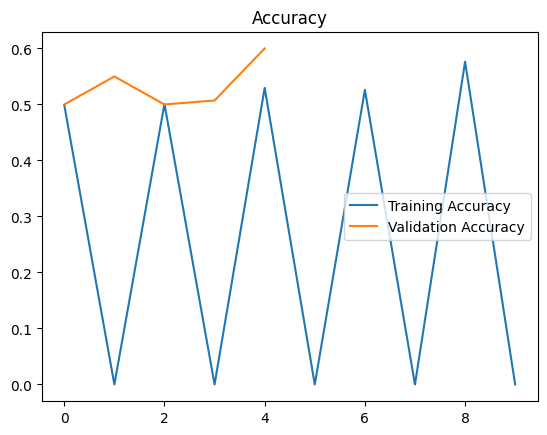

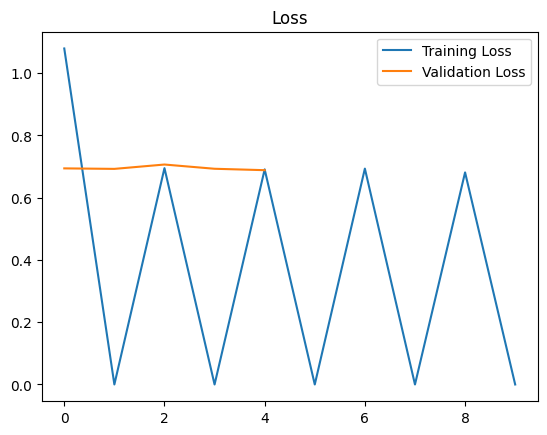

In [ ]:
#analisis hasil train
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()


# 5. VISUALISASI HASIL

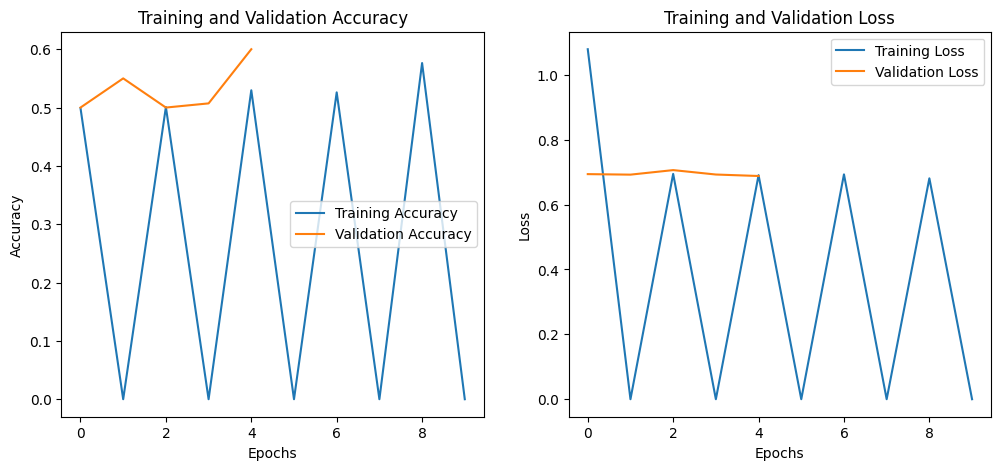

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Class: Dog, Confidence: 0.78


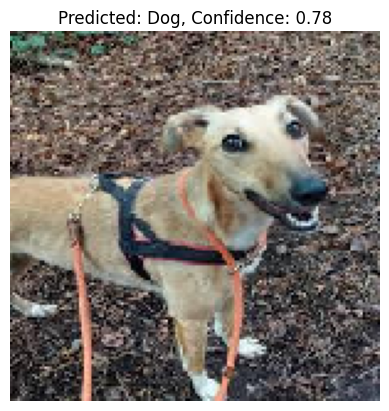

In [ ]:
#Visualisasi Prediksi
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Fungsi untuk prediksi satu gambar
def predict_image(img_path, model, class_indices):
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension

    prediction = model.predict(img_array)
    predicted_class = "Dog" if prediction[0] > 0.5 else "Cat"
    confidence = prediction[0][0] if prediction[0] > 0.5 else 1 - prediction[0][0]

    return predicted_class, confidence

# Contoh prediksi
img_path = "/content/test/dogs/dog_114.jpg"  #  path gambar uji
predicted_class, confidence = predict_image(img_path, model, train_generator.class_indices)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")

# Visualisasi gambar dan hasil prediksi
img = load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}, Confidence: {confidence:.2f}")
plt.axis('off')
plt.show()


# 6 Menyimpan Model dan menggunakannya

In [ ]:
# Simpan model ke file
model.save("cats_and_dogs_model.h5")
print("Model saved as 'cats_and_dogs_model.h5'")


Model saved as 'cats_and_dogs_model.h5'


In [ ]:
from tensorflow.keras.models import load_model

# Memuat model dari file
loaded_model = load_model("cats_and_dogs_model.h5")
print("Model loaded successfully.")


Model loaded successfully.


In [ ]:
#MEMPROSES GAMBAR BARU

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Memuat gambar baru
image_path = "/content/test/dogs/dog_159.jpg"  # Ganti dengan path gambar
image = load_img(image_path, target_size=(150, 150))  # Sesuaikan dengan ukuran input model
image_array = img_to_array(image) / 255.0  # Normalisasi piksel ke [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Tambahkan batch dimension

# Prediksi
prediction = loaded_model.predict(image_array)
predicted_class = "Dog" if prediction[0][0] > 0.5 else "Cat"
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class: Dog


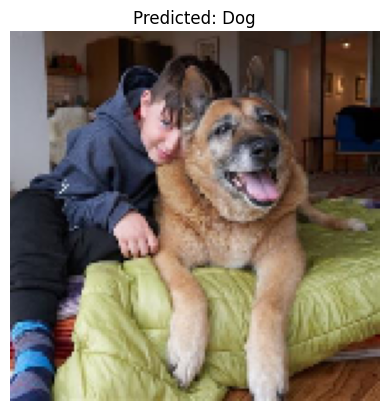

In [ ]:
#VISUALISASI HASIL
plt.imshow(image)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
